In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    print(dirname)
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input
/kaggle/input/sensors-data
/kaggle/input/sensors-data/Sensors_data
/kaggle/input/sensors-data/Sensors_data/Temperature
/kaggle/input/sensors-data/Sensors_data/Temperature/Test
/kaggle/input/sensors-data/Sensors_data/Temperature/Test/Winter
/kaggle/input/sensors-data/Sensors_data/Temperature/Test/Summer
/kaggle/input/sensors-data/Sensors_data/Temperature/Test/Autumn
/kaggle/input/sensors-data/Sensors_data/Temperature/Test/Spring
/kaggle/input/sensors-data/Sensors_data/Temperature/Train
/kaggle/input/sensors-data/Sensors_data/Temperature/Train/Winter
/kaggle/input/sensors-data/Sensors_data/Temperature/Train/Summer
/kaggle/input/sensors-data/Sensors_data/Temperature/Train/Autumn
/kaggle/input/sensors-data/Sensors_data/Temperature/Train/Spring
/kaggle/input/sensors-data/Sensors_data/Humidity
/kaggle/input/sensors-data/Sensors_data/Humidity/Test
/kaggle/input/sensors-data/Sensors_data/Humidity/Test/Winter
/kaggle/input/sensors-data/Sensors_data/Humidity/Test/Summer
/kaggle/inp

In [2]:
import os
import numpy as np
import pandas as pd

from kaggle_datasets import KaggleDatasets
import tensorflow as tf

from tensorflow.keras.applications import DenseNet121

import cv2
from IPython.display import SVG

!pip install plotly

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

!pip install seaborn

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

D0519 19:55:33.002730057      15 config.cc:119]                        gRPC EXPERIMENT tcp_frame_size_tuning               OFF (default:OFF)
D0519 19:55:33.002762147      15 config.cc:119]                        gRPC EXPERIMENT tcp_rcv_lowat                       OFF (default:OFF)
D0519 19:55:33.002766134      15 config.cc:119]                        gRPC EXPERIMENT peer_state_based_framing            OFF (default:OFF)
D0519 19:55:33.002769257      15 config.cc:119]                        gRPC EXPERIMENT flow_control_fixes                  ON  (default:ON)
D0519 19:55:33.002772111      15 config.cc:119]                        gRPC EXPERIMENT memory_pressure_controller          OFF (default:OFF)
D0519 19:55:33.002775025      15 config.cc:119]                        gRPC EXPERIMENT unconstrained_max_quota_buffer_size OFF (default:OFF)
D0519 19:55:33.002777972      15 config.cc:119]                        gRPC EXPERIMENT new_hpack_huffman_decoder           ON  (default:ON)
D0519 19:55:33.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 55.4 MB/s eta 0:00:0000:0100:01
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 KB 6.0 MB/s eta 0:00:0000:01
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [3]:
TRAIN_PATH = '/kaggle/input/sensors-data/Sensors_data/Moisture/Train/'
TEST_PATH = '/kaggle/input/sensors-data/Sensors_data/Moisture/Test/'
TRAIN_FOLDERS = np.sort(os.listdir(TRAIN_PATH))
TEST_FOLDERS = np.sort(os.listdir(TEST_PATH))

In [4]:
print(TRAIN_FOLDERS)

['Autumn' 'Spring' 'Summer' 'Winter']


In [5]:
train_images = []

path_root = '/kaggle/input/sensors-data/Sensors_data/Moisture/Test/'
for mod in TEST_FOLDERS:
    images = os.listdir(path_root + mod)[:1]
    for file_name in images:
        image_path = path_root+ mod+'/'+file_name
        
        orig_image = cv2.imread(image_path)
        image = orig_image[80:-80, 110:-100]        # cropping image
        train_images.append(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        
train_images = np.array(train_images)

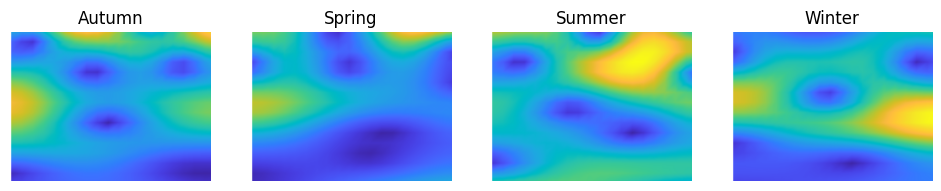

In [6]:
def display_images():
    rows, col = 2, 5
    #rows, col = 2, 2
    fig = plt.figure(figsize=(15,7))
    for index, image in enumerate(train_images):
        ax = fig.add_subplot(rows, col, index+1)
        ax.imshow(train_images[index])
        ax.set_title(TRAIN_FOLDERS[index])
        ax.axis('off')
        
    plt.show()
    
display_images()

In [7]:
train_labels = []
test_labels = []

def generate_train_labels():
    for CLASS in TRAIN_FOLDERS:
        images = os.listdir( TRAIN_PATH+ CLASS)
        for image in range(len(images)):
            train_labels.append(CLASS)
            
def generate_test_labels():
    for CLASS in TEST_FOLDERS:
        images = os.listdir(TEST_PATH+CLASS)
        for image in range(len(images)):
            test_labels.append(CLASS)

generate_train_labels()
generate_test_labels()

train_labels = pd.get_dummies(train_labels)
test_labels = pd.get_dummies(test_labels)

labels = train_labels

train_labels = np.float32(train_labels[list(TRAIN_FOLDERS)].values)
test_labels = np.float32(test_labels[list(TEST_FOLDERS)].values)

train_labels[:3]

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]], dtype=float32)

In [8]:
fig = go.Figure(
                [go.Pie(labels=TRAIN_FOLDERS, 
                        values=labels.sum().values,
                        marker=dict(colors=['#026416','#C73104','#C05209','#6F2F05']))
                ])

fig.update_layout(width=900, height=400, title= {'text': "Dataset Distribution",
                                                'y':0.95,'x':0.43,
                                                'xanchor': 'center','yanchor': 'top'},
                 margin = dict(l=50, r=10, t=50, b=30))

In [9]:
GCS_PATH = KaggleDatasets().get_gcs_path()
GCS_PATH

get_gcs_path is not required on TPU VMs which can directly use Kaggle datasets, using path: /kaggle/input/sensors-data


'/kaggle/input/sensors-data'

In [10]:
GCS_PATH = KaggleDatasets().get_gcs_path()

test_path = []
train_path = []

def generate_test_path():
    path_root = GCS_PATH + '/Sensors_data/Moisture/Test/'
    for CLASS in TEST_FOLDERS:
        images = os.listdir('/kaggle/input/sensors-data/Sensors_data/Moisture/Test/'+ CLASS)
        for image in images:
            test_path.append(path_root+CLASS+'/'+image)

def generate_train_path():
    path_root = GCS_PATH + '/Sensors_data/Moisture/Train/'
    for CLASS in TRAIN_FOLDERS:
        images = os.listdir('/kaggle/input/sensors-data/Sensors_data/Moisture/Train/'+ CLASS)
        for image in images:
            train_path.append(path_root+CLASS+'/'+image)
            
generate_train_path()
generate_test_path()

get_gcs_path is not required on TPU VMs which can directly use Kaggle datasets, using path: /kaggle/input/sensors-data


In [11]:
train_path[:2]

['/kaggle/input/sensors-data/Sensors_data/Moisture/Train/Autumn/Moisture41.png',
 '/kaggle/input/sensors-data/Sensors_data/Moisture/Train/Autumn/Moisture45.png']

In [12]:
print('Train :')
print('   Labels')
print('   ',train_labels.shape)
print('   Images')
print('   ',len(train_path))
print('')
print('Test :')
print('   Labels')
print('   ',test_labels.shape)
print('   Images')
print('   ',len(test_path))

Train :
   Labels
    (278, 4)
   Images
    278

Test :
   Labels
    (64, 4)
   Images
    64


In [13]:
def decode_image(filename, label):
    image_size = (512,512)
    bits = tf.io.read_file(filename)
    image = tf.image.decode_jpeg(bits, channels=3)
    image = tf.cast(image, tf.float32) / 255.0
    image = tf.image.resize(image, image_size)
    
    return image, label

def augment_image(image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    
    return image, label

In [14]:
# detect and init the TPU
tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)


# instantiate a distribution strategy
strategy = tf.distribute.experimental.TPUStrategy(tpu)


BATCH_SIZE = 16 * strategy.num_replicas_in_sync

INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.
INFO:tensorflow:Initializing the TPU system: local
INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


In [15]:
AUTO = tf.data.experimental.AUTOTUNE

train_dataset = (
        tf.data.Dataset\
        .from_tensor_slices((train_path, train_labels))\
        .map(decode_image, num_parallel_calls=AUTO)\
        .map(augment_image, num_parallel_calls=AUTO)\
        .repeat()\
        .shuffle(512)\
        .batch(BATCH_SIZE)\
        .prefetch(AUTO)\
        )

test_dataset = (
    tf.data.Dataset\
    .from_tensor_slices((test_path, test_labels))\
    .map(decode_image, num_parallel_calls=AUTO)\
    .batch(BATCH_SIZE)
    .cache()
    .prefetch(AUTO)
)

In [55]:
with strategy.scope():
    model = tf.keras.models.Sequential()

    model.add(DenseNet121(
                     input_shape=(512,512,3),
                     weights = 'imagenet',
                     include_top=False))

    model.add(tf.keras.layers.GlobalAveragePooling2D())

    model.add(tf.keras.layers.Dense(train_labels.shape[1],
                                   activation='softmax'))

    model.compile(optimizer='adam', 
                 loss='categorical_crossentropy',
                 metrics=['categorical_accuracy'])

In [54]:
# Learning rate scheduler

def build_lrfn(lr_start=0.000001, lr_max=0.000005, 
               lr_min=0.000001, lr_rampup_epochs=6,
               lr_sustain_epochs=0, lr_exp_decay=.3):
    lr_max = lr_max * strategy.num_replicas_in_sync

    def lrfn(epoch):
        if epoch < lr_rampup_epochs:
            lr = (lr_max - lr_start) / lr_rampup_epochs * epoch + lr_start
        elif epoch < lr_rampup_epochs + lr_sustain_epochs:
            lr = lr_max
        else:
            lr = (lr_max - lr_min) *\
                 lr_exp_decay**(epoch - lr_rampup_epochs\
                                - lr_sustain_epochs) + lr_min
        return lr
    return lrfn

lrfn = build_lrfn()
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lrfn, verbose=1)
callbacks_list = [lr_schedule]
STEPS_PER_EPOCH = train_labels.shape[0]//BATCH_SIZE

In [56]:
history = model.fit(train_dataset,
                    epochs = 50,
                    callbacks = callbacks_list,
                    steps_per_epoch = STEPS_PER_EPOCH,
                    validation_data = test_dataset)


Epoch 1: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1/50


2023-05-19 20:36:48.690323: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
2023-05-19 20:36:50.525591: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.


2/2 [==============================] - ETA: 0s - loss: 1.4986 - categorical_accuracy: 0.2578  

2023-05-19 20:38:20.901995: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
2023-05-19 20:38:21.335750: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.


2/2 [==============================] - 158s 20s/step - loss: 1.4986 - categorical_accuracy: 0.2578 - val_loss: 1.4726 - val_categorical_accuracy: 0.1875 - lr: 1.0000e-06

Epoch 2: LearningRateScheduler setting learning rate to 7.500000000000001e-06.
Epoch 2/50
2/2 [==============================] - 2s 2s/step - loss: 1.5674 - categorical_accuracy: 0.2227 - val_loss: 1.4704 - val_categorical_accuracy: 0.1875 - lr: 7.5000e-06

Epoch 3: LearningRateScheduler setting learning rate to 1.4000000000000003e-05.
Epoch 3/50
2/2 [==============================] - 2s 2s/step - loss: 1.5602 - categorical_accuracy: 0.2227 - val_loss: 1.4719 - val_categorical_accuracy: 0.1875 - lr: 1.4000e-05

Epoch 4: LearningRateScheduler setting learning rate to 2.0500000000000004e-05.
Epoch 4/50
2/2 [==============================] - 2s 2s/step - loss: 1.4708 - categorical_accuracy: 0.3008 - val_loss: 1.4729 - val_categorical_accuracy: 0.1875 - lr: 2.0500e-05

Epoch 5: LearningRateScheduler setting learning rate 

In [57]:
EPOCHS = 50
def display_training_curves(training, validation, yaxis):
    if yaxis == "loss":
        ylabel = "Loss"
        title = "Loss vs. Epochs"
    else:
        ylabel = "Accuracy"
        title = "Accuracy vs. Epochs"
        
    fig = go.Figure()
        
    fig.add_trace(
        go.Scatter(x=np.arange(1, EPOCHS+1), mode='lines+markers', y=training, marker=dict(color="dodgerblue"),
               name="Train"))
    
    fig.add_trace(
        go.Scatter(x=np.arange(1, EPOCHS+1), mode='lines+markers', y=validation, marker=dict(color="darkorange"),
               name="Val"))
    
    fig.update_layout(title_text=title, yaxis_title=ylabel, xaxis_title="Epochs", template="plotly_white")
    fig.show()

In [58]:
display_training_curves(
    history.history['categorical_accuracy'], 
    history.history['val_categorical_accuracy'], 
    'accuracy')

In [59]:
acc_df = pd.DataFrame(np.transpose([[*np.arange(1, EPOCHS+1).tolist()*3], ["Train"]*EPOCHS + ["Val"]*EPOCHS + ["Benchmark"]*EPOCHS,
                                     history.history['categorical_accuracy'] + history.history['val_categorical_accuracy'] + [1.0]*EPOCHS]))
acc_df.columns = ["Epochs", "Stage", "Accuracy"]
fig = px.bar(acc_df, x="Accuracy", y="Stage", animation_frame="Epochs", title="Accuracy vs. Epochs", color='Stage',
       color_discrete_map={"Train":"dodgerblue", "Val":"darkorange", "Benchmark":"seagreen"}, orientation="h")

fig.update_layout(
    xaxis = dict(
        autorange=False,
        range=[0, 1]
    )
)

fig.update_layout(template="plotly_white")

In [60]:
model.evaluate(test_dataset)

1/1 [==============================] - 1s 1s/step - loss: 1.4902 - categorical_accuracy: 0.1875


[1.490185022354126, 0.1875]

In [61]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, zero_one_loss, classification_report

In [62]:
y_test = np.array([])
y_pred = np.array([])

for images, labels in test_dataset:
    y_test = np.append(y_test, np.array(labels).argmax(axis=1))
    y_pred= np.append(y_test, np.array(model.predict(images)).argmax(axis= -1))


2023-05-19 20:40:42.169484: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
2023-05-19 20:40:42.731527: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.


2/2 [==============================] - 30s 47ms/step


In [63]:
y_pred.shape

(128,)

In [64]:
y_pred = y_pred[:y_test.shape[0]]

In [53]:
cm = confusion_matrix(y_test,y_pred)
print(cm, '\n')

zol = zero_one_loss(y_test, y_pred, normalize = False)
print(zol, '\n')

cr = classification_report(y_test, y_pred)
print(cr)

[[12  0  0  0]
 [ 0 14  0  0]
 [ 0  0 19  0]
 [ 0  0  0 19]] 

0 

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        12
         1.0       1.00      1.00      1.00        14
         2.0       1.00      1.00      1.00        19
         3.0       1.00      1.00      1.00        19

    accuracy                           1.00        64
   macro avg       1.00      1.00      1.00        64
weighted avg       1.00      1.00      1.00        64



<Figure size 500x500 with 0 Axes>

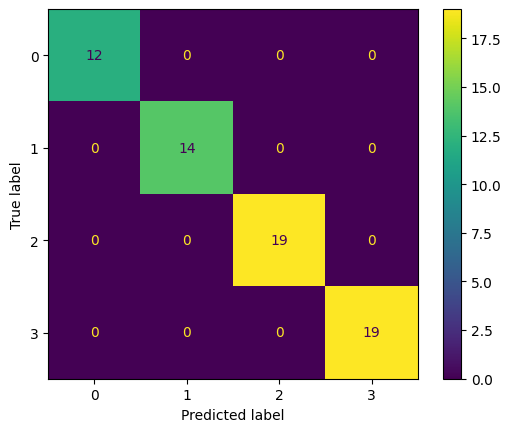

In [65]:
plt.figure(figsize = (5,5))
ConfusionMatrixDisplay(cm).plot()
plt.show()